## Basics


In [ ]:
# imports
import numpy as np


from commstools import set_backend
from commstools.backend import ensure_on_backend
from commstools.filtering import rrc_taps, gaussian_taps
from commstools.plotting import plot_ideal_constellation
from commstools.sequences import prbs
from commstools import waveforms
import commstools.plotting as plotting

set_backend("gpu")


Let's define base system parameters and generate a waveform,

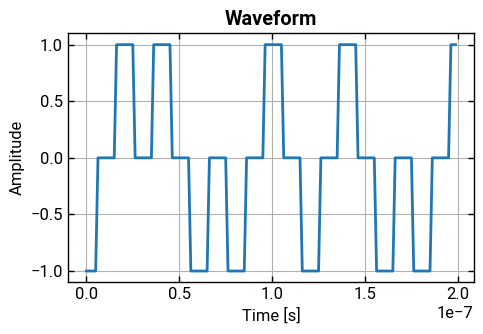

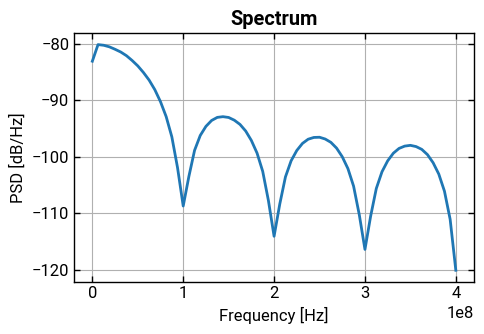

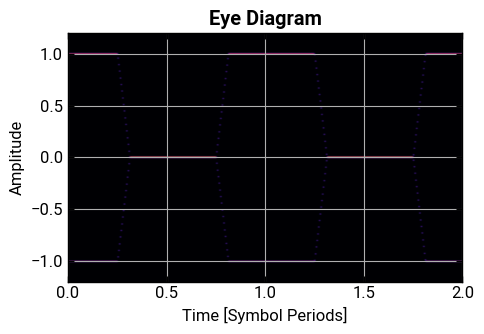

RZ-PAM-2


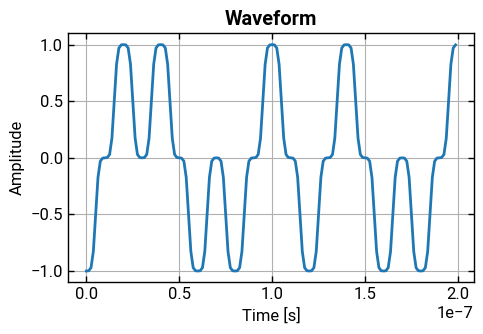

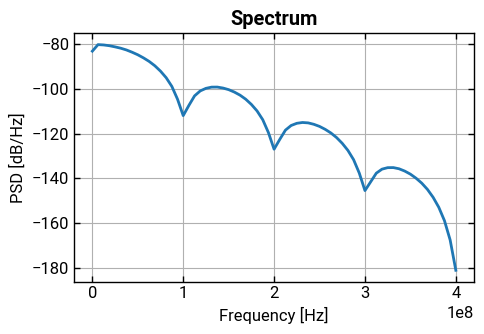

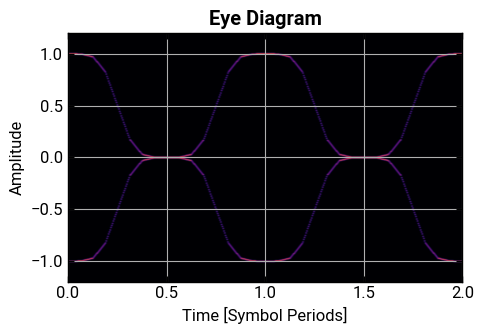

In [ ]:
import matplotlib.pyplot as plt

# Define system parameters
symbol_rate = 50e6
sampling_rate = 800e6
sps = int(sampling_rate / symbol_rate)
rrc_rolloff = 0.1

pam2rz = waveforms.rzpam_waveform(
    order=2,
    num_symbols=100_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="rect",
    seed=42,
)
pam2rz.plot_symbols(show=True, num_symbols=10)
pam2rz.plot_psd(show=True)
pam2rz.plot_eye(show=True)
print(pam2rz.modulation_format)

pam2rz = waveforms.rzpam_waveform(
    order=2,
    num_symbols=100_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="smoothrect",
    seed=42,
)
pam2rz.plot_symbols(show=True, num_symbols=10)
pam2rz.plot_psd(show=True)
pam2rz.plot_eye(show=True, type="hist")


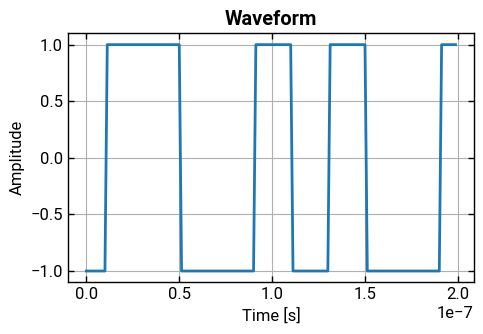

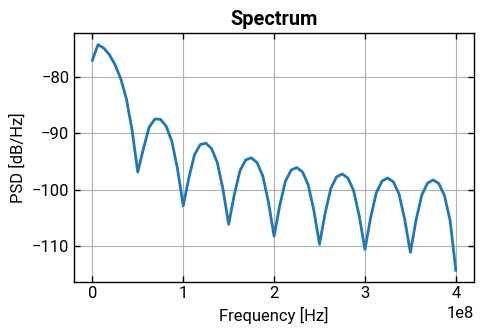

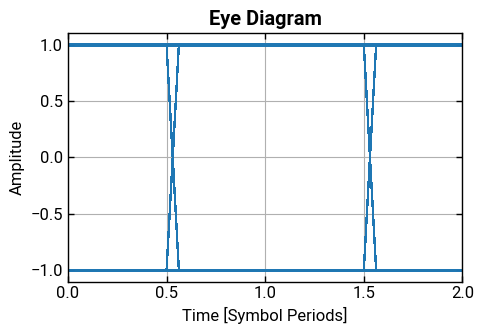

PAM-2


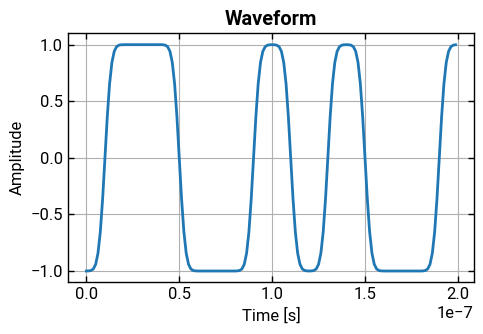

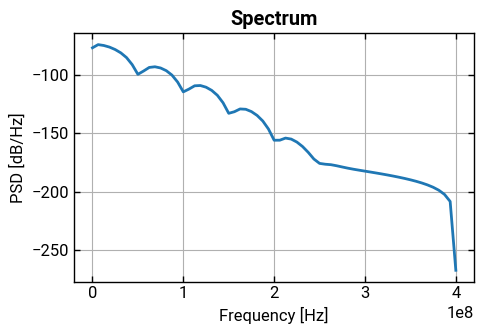

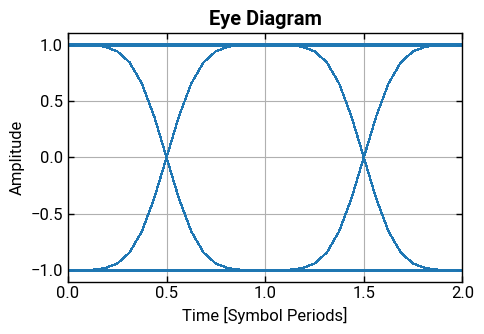

PAM-2


In [ ]:
pam2nrz = waveforms.pam_waveform(
    order=2,
    num_symbols=100_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="rect",
    seed=42,
)
pam2nrz.plot_symbols(show=True, num_symbols=10)
pam2nrz.plot_psd(show=True)
pam2nrz.plot_eye(show=True, type="line")
print(pam2nrz.modulation_format)

pam2nrz = waveforms.pam_waveform(
    order=2,
    num_symbols=100_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="smoothrect",
    seed=42,
)
pam2nrz.plot_symbols(show=True, num_symbols=10)
pam2nrz.plot_psd(show=True)
pam2nrz.plot_eye(show=True, type="line")
print(pam2nrz.modulation_format)


In [ ]:
import cupy as cp

cp.random.randn(10)


ImportError: libcurand.so.10: cannot open shared object file: No such file or directory

In [ ]:
import matplotlib.pyplot as plt

symbol_rate = 50e6
sampling_rate = 800e6
sps = int(sampling_rate / symbol_rate)
rrc_rolloff = 0.1

pam2rz = waveforms.pam_waveform(
    order=2,
    num_symbols=100_000,
    sps=4,
    symbol_rate=symbol_rate,
    type="nrz",
    pulse_shape="rect",
    seed=42,
)
pam2rz.plot_symbols(show=True, num_symbols=20)
# pam2rz.plot_psd(show=True)
plt.plot(pam2rz.samples[:100:].get())
print(pam2rz.samples.shape)

pam2rz = waveforms.pam_waveform(
    order=2,
    num_symbols=100_000,
    sps=4,
    symbol_rate=symbol_rate,
    type="nrz",
    pulse_shape="smoothrect",
    seed=42,
)
pam2rz.plot_symbols(show=True, num_symbols=20)
# pam2rz.plot_psd(show=True)
plt.plot(pam2rz.samples[:100:].get())
print(pam2rz.samples.shape)

pam2rz = waveforms.pam_waveform(
    order=2,
    num_symbols=100_000,
    sps=4,
    symbol_rate=symbol_rate,
    type="nrz",
    pulse_shape="rrc",
    seed=42,
)
pam2rz.plot_symbols(show=True, num_symbols=20)
# pam2rz.plot_psd(show=True)
plt.plot(pam2rz.samples[:100:].get())
print(pam2rz.samples.shape)


In [ ]:
sig_smooth


In [ ]:
from commstools import filtering

samples_rect = sig_rect.samples

plt.plot(samples_rect[:100])

samples_rectfilt = filtering.fir_filter(
    samples_rect, filtering.gaussian_taps(sps=sps, span=10, bt=1)
)

plt.plot(samples_rectfilt[:100])

plt.figure()
plt.plot(samples_rect[-100:])
plt.plot(samples_rectfilt[-100:])


In [ ]:
from commstools import filtering, plotting

h = filtering.smoothrect_taps(sps=6, span=5, bt=1.0)

plotting.filter_response(h, 6, show=True)


In [ ]:
sig = generate_waveform(
    modulation="ask",
    order=2,
    num_symbols=10_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="none",
    rrc_rolloff=rrc_rolloff,
    gaussian_bt=0.1,
    seed=43,
)


In [ ]:
samples = sig.samples

plt.figure()
plt.plot(samples[:100])
plt.figure()
plt.plot(samples[-100:])


In [ ]:
s1 = filtering.fir_filter(samples, taps0)

plt.figure()
plt.plot(s1[:100])
plt.figure()
plt.plot(s1[-100:])

print(s1.shape)


In [ ]:
s2 = filtering.fir_filter(samples, taps1)

plt.figure()
plt.plot(s2[:100])
plt.figure()
plt.plot(s2[-100:])

print(s2.shape)


In [ ]:
s3 = filtering.fir_filter(samples, taps2)

plt.figure()
plt.plot(s3[:100])
plt.figure()
plt.plot(s3[-100:])

print(s3.shape)


In [ ]:
s1 - s2

plt.plot((s1 - s2)[:100])


In [ ]:
s2


In [ ]:
# check if arrays are equal
import numpy as np

np.array_equal(s1, s1)


In [ ]:
sig_rect = generate_waveform(
    modulation="ask",
    order=2,
    num_symbols=10_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="smoothrect",
    rrc_rolloff=rrc_rolloff,
    gaussian_bt=0.1,
    seed=43,
)

sig_rect.plot_symbols(
    num_symbols=20, show=True, title="Expanded Bit Sequence (20 symbols)"
)
sig_rect.plot_psd(show=True)
sig_rect.plot_eye(show=True, type="hist")


In [ ]:
sig_rect.samples.shape


In [ ]:
gaus_taps = gaussian_taps(sps=sps, span=10, bt=0.5)

sig_rect.fir_filter(gaus_taps)

sig_rect.plot_symbols(
    num_symbols=20, show=True, title="Expanded Bit Sequence (20 symbols)"
)
sig_rect.plot_psd(show=True)


In [ ]:
sig_rrc = generate_waveform(
    modulation="qam",
    order=4,
    num_symbols=10_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="rrc",
    rrc_rolloff=rrc_rolloff,
    gaussian_bt=0.28,
    filter_span=10,
    seed=43,
)

sig_rrc.plot_symbols(
    num_symbols=20, show=True, title="Expanded Bit Sequence (20 symbols)"
)
sig_rrc.plot_psd(show=True)


Let's investigate the RRC filter we applied.

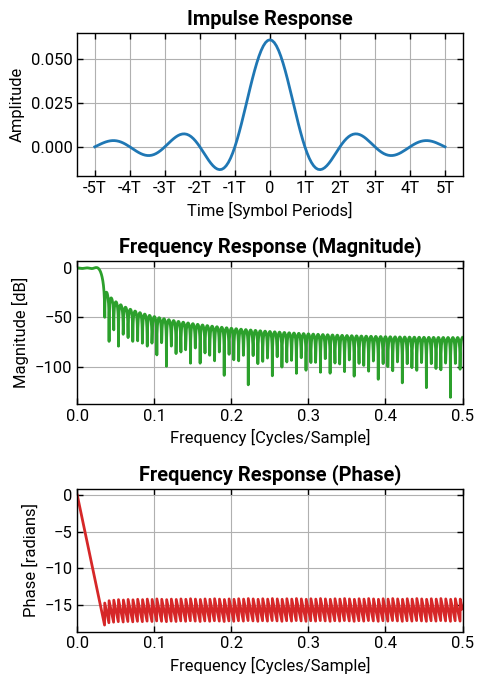

In [ ]:
from commstools.filtering import rc_taps

# Create the same RRC filter
rrc_filter = rc_taps(sps=sps, rolloff=rrc_rolloff, span=10)

# Plot the filter response
plotting.filter_response(rrc_filter, sps, show=True)


Let's add some noise to the signal for naive representation of distorted signal on the receiver.

Now we can check what happens on the receiver side.
As the pulse shape is RRC, we need to use a matched filter with the same RRC shape at the receiver.

In [ ]:
from commstools.mapping import gray_constellation

a = gray_constellation("ask", 16)
print(a)
print((a - a.min()))


[-15. -13.  -9. -11.  -1.  -3.  -7.  -5.  15.  13.   9.  11.   1.   3.
   7.   5.]
[ 0.  2.  6.  4. 14. 12.  8. 10. 30. 28. 24. 26. 16. 18. 22. 20.]
